uint8
(490, 1008, 3)


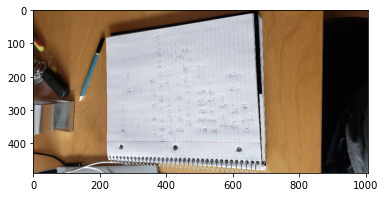

In [1]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

image = image.imread('test.jpg')
image = image[::4, ::4, :]
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
plt.imshow(image)
plt.show()

202 209 219
[219 222 231]
[227 223 221]


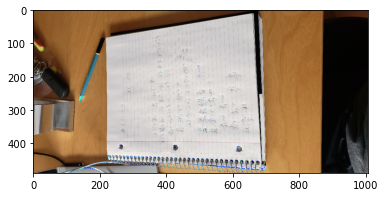

In [6]:
r, g, b = image[250, 500, :]
r = int(r)
g = int(g)
b = int(b)
print (r, g, b)

print(image[250, 400, :])
image_corrected = np.copy(image)

image_corrected[:, :, 0] = image_corrected[:, :, 0] * ((r + g + b) / (3 * r))
image_corrected[:, :, 1] = image_corrected[:, :, 1] * ((r + g + b) / (3 * g))
image_corrected[:, :, 2] = image_corrected[:, :, 2] * ((r + g + b) / (3 * b))

print(image_corrected[250, 400, :])

plt.imshow(image_corrected)
plt.show()

In [7]:
C = 1 / 0.17697 * np.array([
    [0.49, 0.31, 0.20],
    [0.17697, 0.81240, 0.01063],
    [0.00, 0.01, 0.99]
])

def rgb_to_chrom(rgb):
    c = C @ rgb
    return c

c = rgb_to_chrom([1, 1, 1])
c /= np.sum(c)
print(c)

[0.33333333 0.33333333 0.33333333]


In [24]:
img_chrom = np.apply_along_axis(rgb_to_chrom, -1, image / 255.)

In [25]:
print(img_chrom[250, 400, :])

[4.92672404 4.90976669 5.11685264]


In [26]:
x, y, z = img_chrom[250, 500, :]
x_norm = x / (x + y + z)
y_norm = y / (x + y + z)
z_norm = z / (x + y + z)

print(img_chrom[250, 400, :])
img_chrom_corrected = np.copy(img_chrom)
img_chrom_corrected[:,:,0] = img_chrom[:,:,0] / (3 * x_norm)
img_chrom_corrected[:,:,1] = img_chrom[:,:,1] / (3 * y_norm)
img_chrom_corrected[:,:,2] = img_chrom[:,:,2] / (3 * z_norm)
print(img_chrom_corrected[250, 400, :])

[4.92672404 4.90976669 5.11685264]
[5.01871796 4.99428567 4.94260935]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[229.07757032 224.60388827 223.03113471]
[211.44583667 211.44583667 211.44583667]


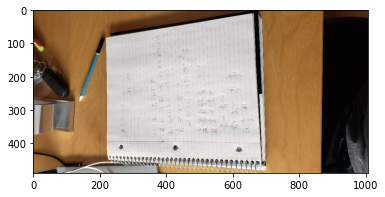

In [27]:
from numpy.linalg import inv

def chrom_to_rgb(xyz):
    C_inv = inv(C)
    rgb = C_inv @ xyz
    return rgb

img_chrom_corrected_rgb = np.apply_along_axis(chrom_to_rgb, -1, img_chrom_corrected)
print(img_chrom_corrected_rgb[250, 400, :] * 255)
print(img_chrom_corrected_rgb[250, 500, :] * 255)

plt.imshow(img_chrom_corrected_rgb)
plt.show()

In [29]:
from numpy.linalg import inv

combined_C = inv(C) @ np.diag([1 / (3 * x_norm), 1 / (3 * y_norm), 1 / (3 * z_norm)]) @ C
print(combined_C @ np.array([[202], [209], [219]]))

[[211.44583667]
 [211.44583667]
 [211.44583667]]
